In [2]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Dataset'))
sys.path.append(os.path.abspath('..'))

import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from func_preprocesamiento import precio_por_m2

In [4]:

train_procesado = pd.read_csv('../Dataset/Procesado/train_procesado.csv')
train_completo = pd.read_csv('../Dataset/Procesado/train_completo.csv')

val_procesado = pd.read_csv('../Dataset/Procesado/val_procesado.csv')
val_completo = pd.read_csv('../Dataset/Procesado/val_completo.csv')

df_completo = pd.concat([train_completo, val_completo], axis=0)
df_completo = precio_por_m2(df_completo)


/tmp/ipykernel_9698/583313933.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  train_completo = pd.read_csv('../Dataset/Procesado/train_completo.csv')


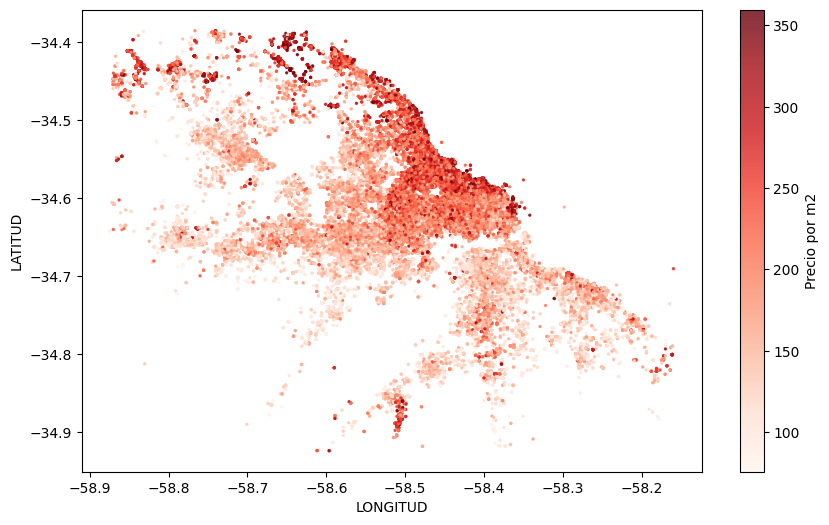

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df_completo['LONGITUDE'], df_completo['LATITUDE'], c=df_completo['precio_por_m2'], alpha=0.8, s=2, cmap='Reds')
plt.colorbar(label='Precio por m2')
plt.xlabel('LONGITUD')
plt.ylabel('LATITUD')
plt.show()


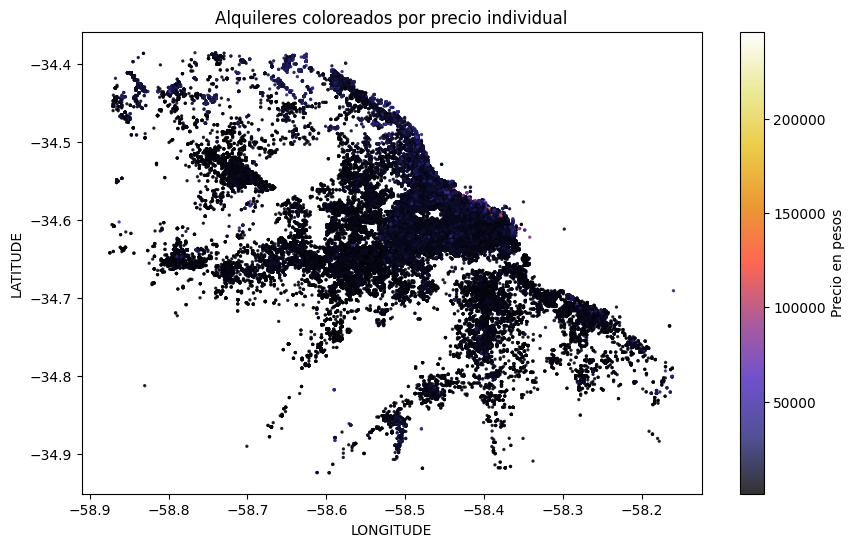

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df_completo['LONGITUDE'], df_completo['LATITUDE'], c=df_completo['precio_pesos_constantes'], alpha=0.8, s=2, cmap='CMRmap')
plt.colorbar(label='Precio en pesos')
plt.title('Alquileres coloreados por precio individual')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.show()

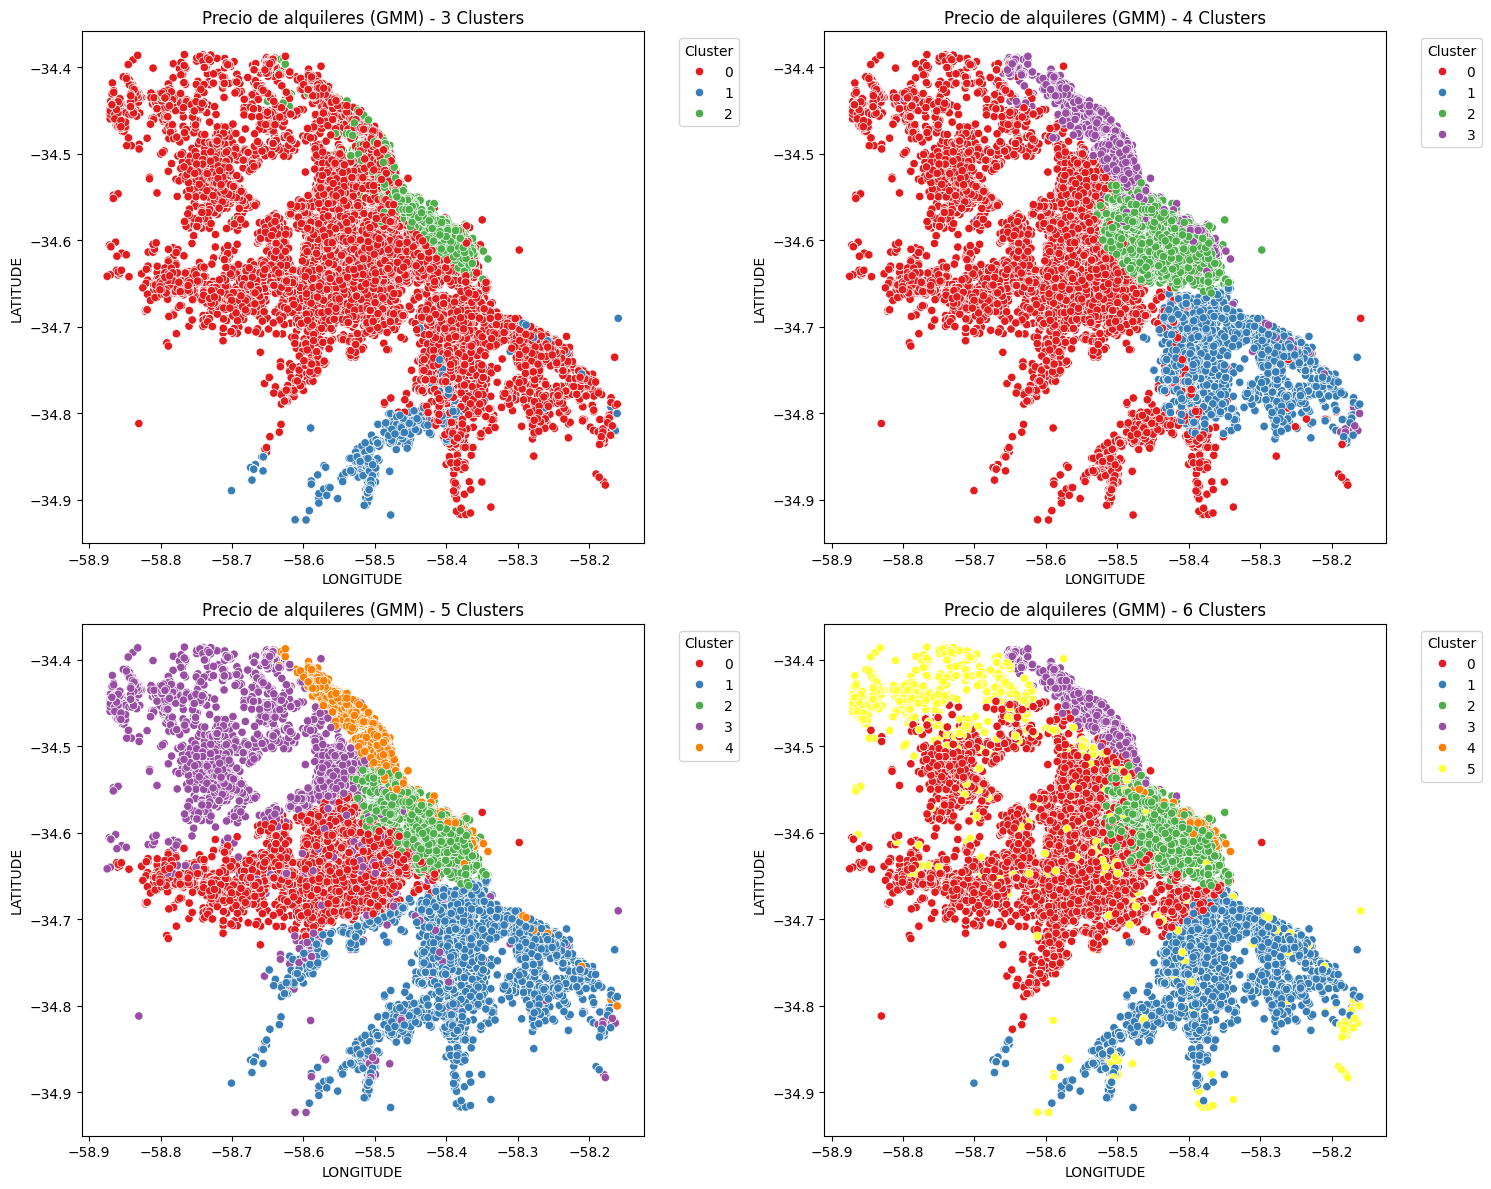

In [5]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes para el clustering
X = df_completo[['LATITUDE', 'LONGITUDE', 'precio_pesos_constantes']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir los números de clusters a probar
num_clusters = [3, 4, 5, 6]

# Crear subplots con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Crear un gráfico para cada número de clusters
for ax, n_clusters in zip(axes, num_clusters):
    # Aplicar GMM clustering
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', reg_covar=1e-6, random_state=42)
    df_completo['cluster'] = gmm.fit_predict(X_scaled)
    
    # Crear un scatter plot de LATITUDE y LONGITUDE, coloreando por cluster
    scatter_plot = sns.scatterplot(x=df_completo['LONGITUDE'],
                                   y=df_completo['LATITUDE'], 
                                   hue=df_completo['cluster'], 
                                   palette='Set1', 
                                   ax=ax)  # Usar el eje correspondiente

    ax.set_title(f'Precio de alquileres (GMM) - {n_clusters} Clusters')
    ax.set_xlabel('LONGITUDE')
    ax.set_ylabel('LATITUDE')
    ax.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


#### Mismo pero con precio por m2


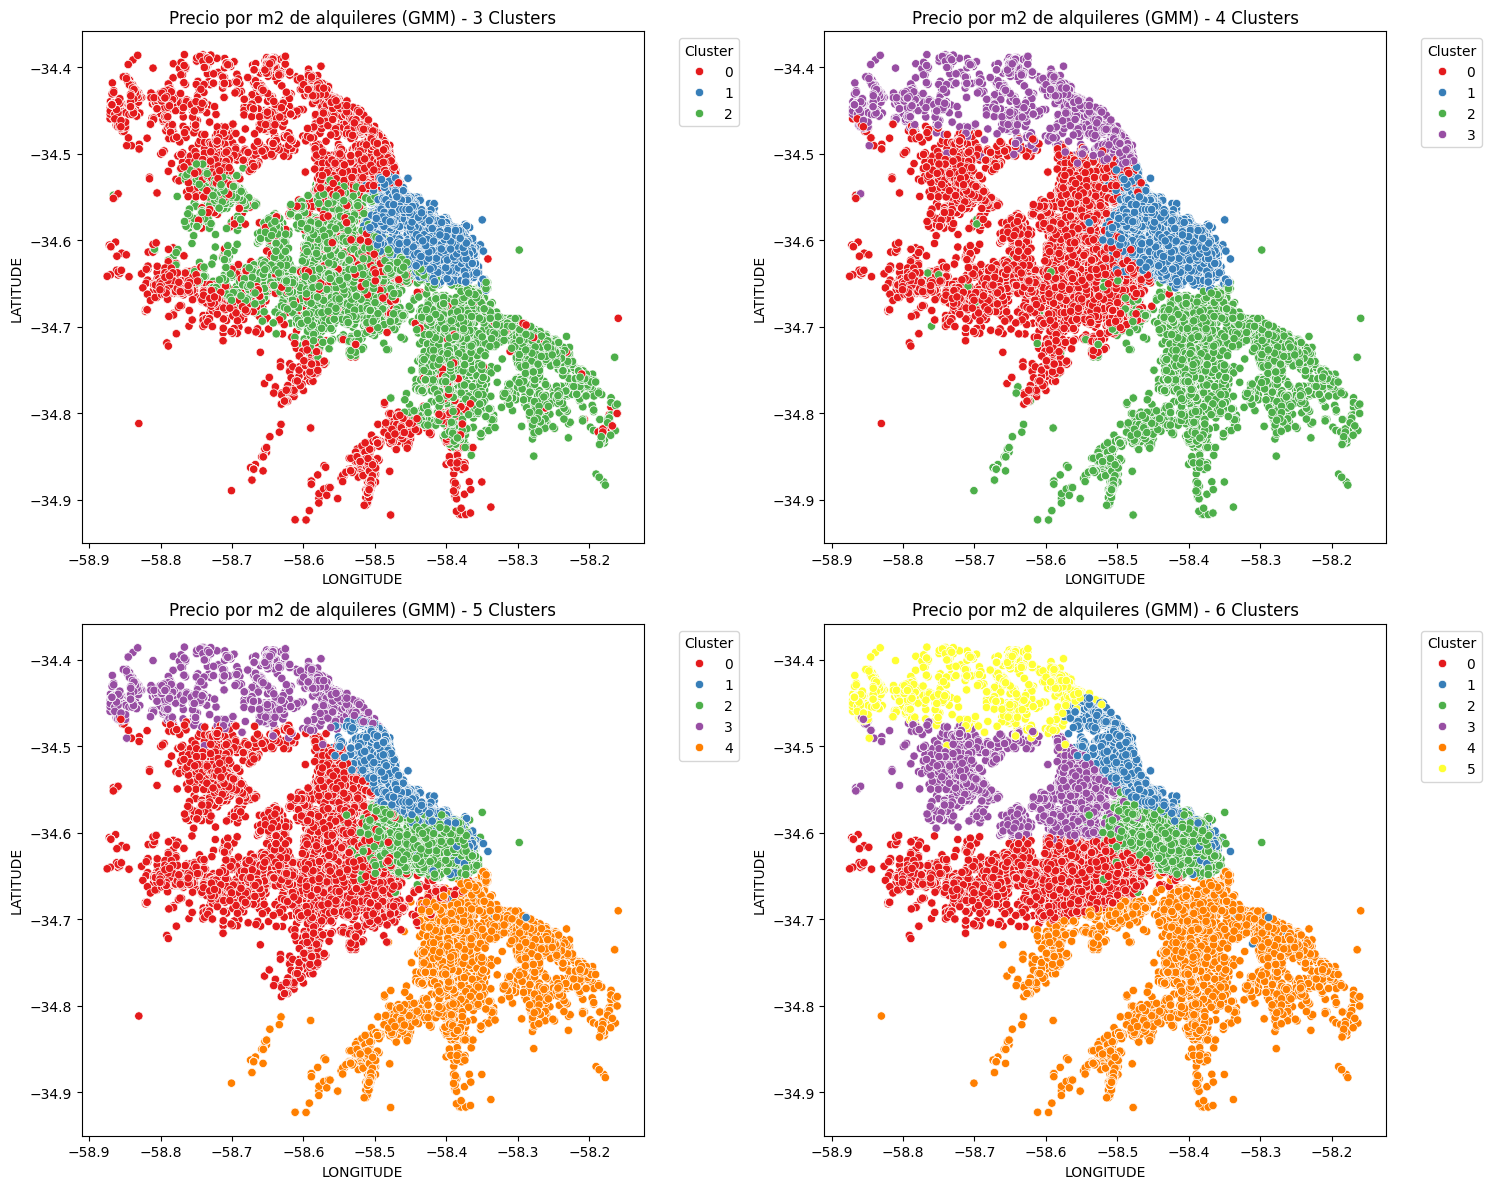

In [6]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes para el clustering
X = df_completo[['LATITUDE', 'LONGITUDE', 'precio_por_m2']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir los números de clusters a probar
num_clusters = [3, 4, 5, 6]

# Crear subplots con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Crear un gráfico para cada número de clusters
for ax, n_clusters in zip(axes, num_clusters):
    # Aplicar GMM clustering
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', reg_covar=1e-6, random_state=42)
    df_completo['cluster'] = gmm.fit_predict(X_scaled)
    
    # Crear un scatter plot de LATITUDE y LONGITUDE, coloreando por cluster
    scatter_plot = sns.scatterplot(x=df_completo['LONGITUDE'],
                                   y=df_completo['LATITUDE'], 
                                   hue=df_completo['cluster'], 
                                   palette='Set1', 
                                   ax=ax)  # Usar el eje correspondiente

    ax.set_title(f'Precio por m2 de alquileres (GMM) - {n_clusters} Clusters')
    ax.set_xlabel('LONGITUDE')
    ax.set_ylabel('LATITUDE')
    ax.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar las columnas relevantes para el clustering
X = df_completo[['LATITUDE', 'LONGITUDE', 'precio_pesos_constantes']]

# Dividir la columna 'precio_pesos_constantes' en 5 categorías usando pd.qcut
X['precio_categoria'] = pd.qcut(X['precio_pesos_constantes'], q=5, labels=False)

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['LATITUDE', 'LONGITUDE', 'precio_categoria']])

# Definir los números de clusters a probar
num_clusters = [3, 4, 5, 6]

# Crear un gráfico para cada número de clusters
for n_clusters in num_clusters:
    # Aplicar GMM clustering
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', reg_covar=1e-6, random_state=42)
    train_completo['cluster'] = gmm.fit_predict(X_scaled)
    
    # Crear un scatter plot de LATITUDE y LONGITUDE, coloreando por cluster
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(x=train_completo['LONGITUDE'],
                                y=train_completo['LATITUDE'], 
                                hue=train_completo['cluster'], 
                                palette='Set1')  # Usar la paleta Set1 para colores distintos

    plt.title('Scatter plot de LATITUDE vs LONGITUDE coloreado por Clusters (GMM) - 5 Clusters')
    plt.xlabel('LONGITUDE')
    plt.ylabel('LATITUDE')

    # Mostrar la leyenda
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Mostrar el gráfico
    plt.show()


/tmp/ipykernel_96497/257303261.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['precio_categoria'] = pd.qcut(X['precio_pesos_constantes'], q=5, labels=False)


ValueError: Length of values (161502) does not match length of index (129201)

### Agrupar previamente los precios

/tmp/ipykernel_96497/622486244.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['precio_categoria'] = pd.qcut(X['precio_pesos_constantes'], q=5, labels=False)


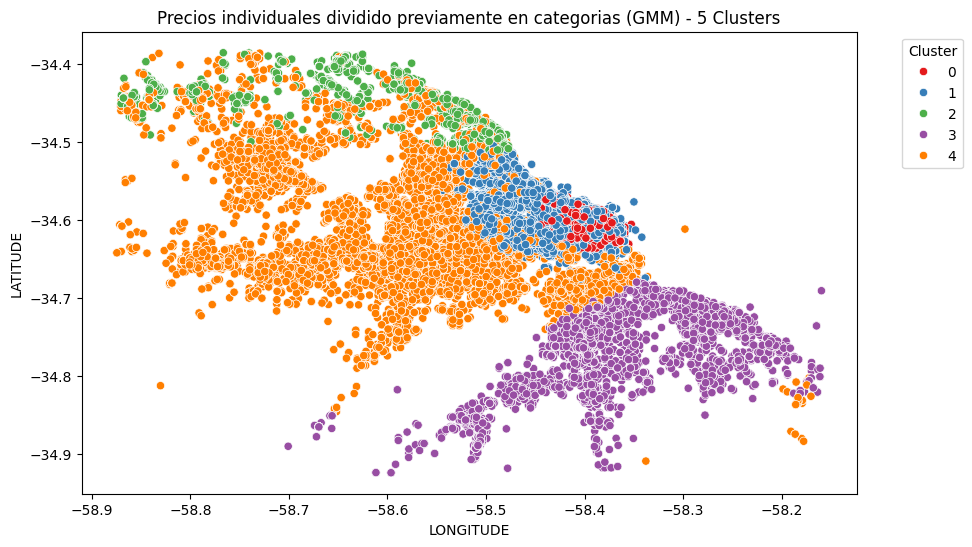

In [28]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar las columnas relevantes para el clustering
X = df_completo[['LATITUDE', 'LONGITUDE', 'precio_pesos_constantes']]

# Dividir la columna 'precio_pesos_constantes' en 5 categorías usando pd.qcut
X['precio_categoria'] = pd.qcut(X['precio_pesos_constantes'], q=5, labels=False)

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['LATITUDE', 'LONGITUDE', 'precio_categoria']])

# Aplicar GMM clustering con 5 clusters
gmm = GaussianMixture(n_components=5, covariance_type='full', reg_covar=1e-6, random_state=42)
df_completo['cluster'] = gmm.fit_predict(X_scaled)

# Crear un scatter plot de LATITUDE y LONGITUDE, coloreado por cluster
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=df_completo['LONGITUDE'],
                               y=df_completo['LATITUDE'], 
                               hue=df_completo['cluster'], 
                               palette='Set1')  # Usar la paleta Set1 para colores distintos

plt.title('Precios individuales dividido previamente en categorias (GMM) - 5 Clusters')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')

# Mostrar la leyenda
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


### GMM ELEGIDA

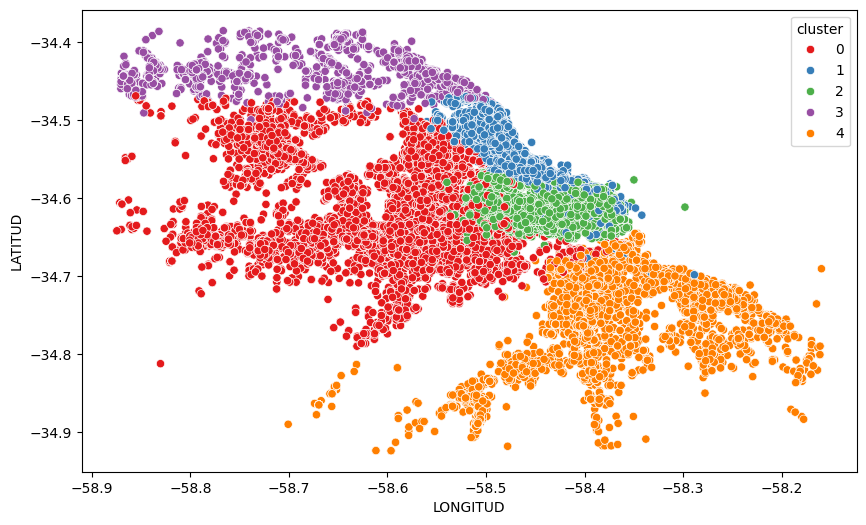

In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar las columnas relevantes para el clustering
X = df_completo[['LATITUDE', 'LONGITUDE', 'precio_por_m2']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar GMM clustering con 5 clusters
gmm = GaussianMixture(n_components=5, covariance_type='full', reg_covar=1e-6, random_state=42)
df_completo['cluster'] = gmm.fit_predict(X_scaled)

# Crear un scatter plot de LATITUDE y LONGITUDE, coloreado por cluster
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=df_completo['LONGITUDE'],
                               y=df_completo['LATITUDE'], 
                               hue=df_completo['cluster'], 
                               palette='Set1')  # Usar la paleta Set1 para colores distintos

#plt.title('Precios por m2 (GMM) - 5 Clusters')
plt.xlabel('LONGITUD')
plt.ylabel('LATITUD')

# Mostrar la leyenda
#plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


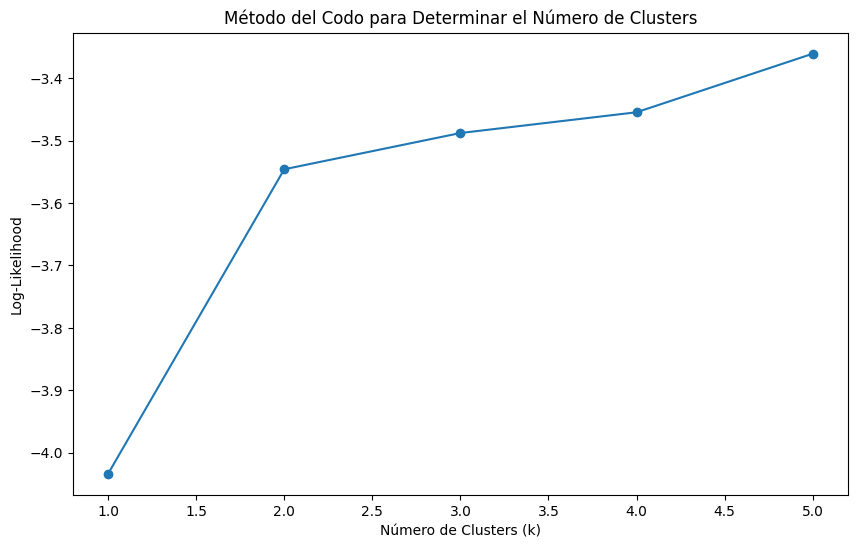

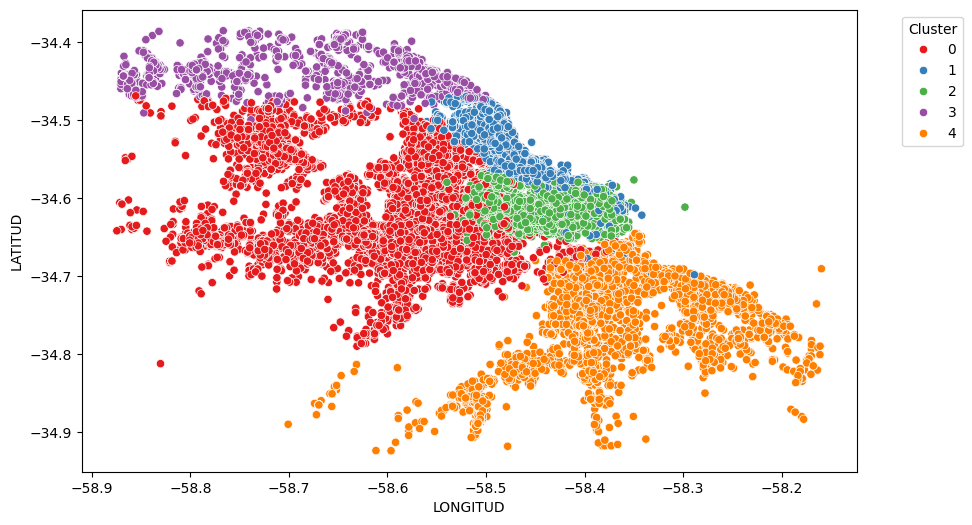

In [15]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar las columnas relevantes para el clustering
X = df_completo[['LATITUDE', 'LONGITUDE', 'precio_por_m2']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular la inercia para diferentes valores de k
k_range = range(1, 6)
inertia = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, covariance_type='full', reg_covar=1e-6, random_state=42)
    gmm.fit(X_scaled)
    inertia.append(gmm.score(X_scaled))

# Graficar la inercia en función de k
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Log-Likelihood')
plt.title('Método del Codo para Determinar el Número de Clusters')
plt.show()

# Seleccionar el número óptimo de clusters (por ejemplo, el que minimiza la inercia)
optimal_k = k_range[inertia.index(max(inertia))]

# Aplicar GMM clustering con el número óptimo de clusters
gmm = GaussianMixture(n_components=optimal_k, covariance_type='full', reg_covar=1e-6, random_state=42)
df_completo['cluster'] = gmm.fit_predict(X_scaled)

# Crear un scatter plot de LATITUDE y LONGITUDE, coloreado por cluster
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=df_completo['LONGITUDE'],
                               y=df_completo['LATITUDE'], 
                               hue=df_completo['cluster'], 
                               palette='Set1')  # Usar la paleta Set1 para colores distintos

plt.xlabel('LONGITUD')
plt.ylabel('LATITUD')

# Mostrar la leyenda
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

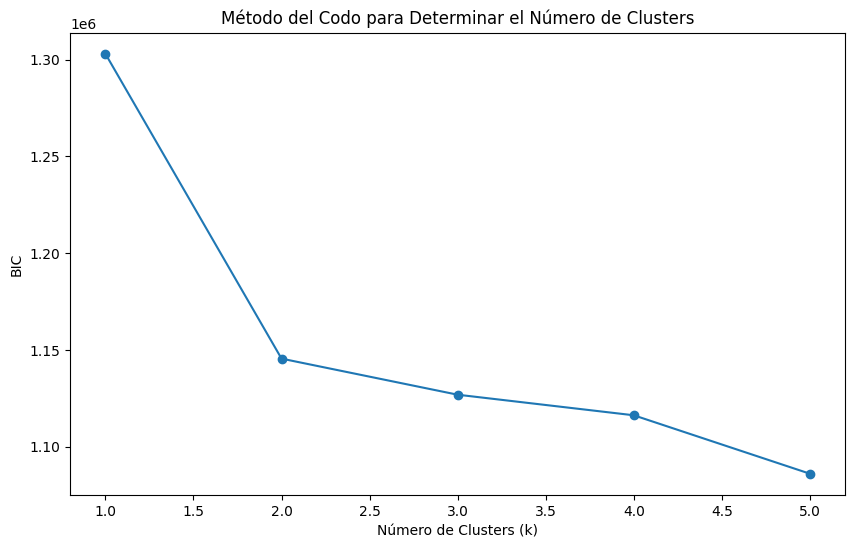

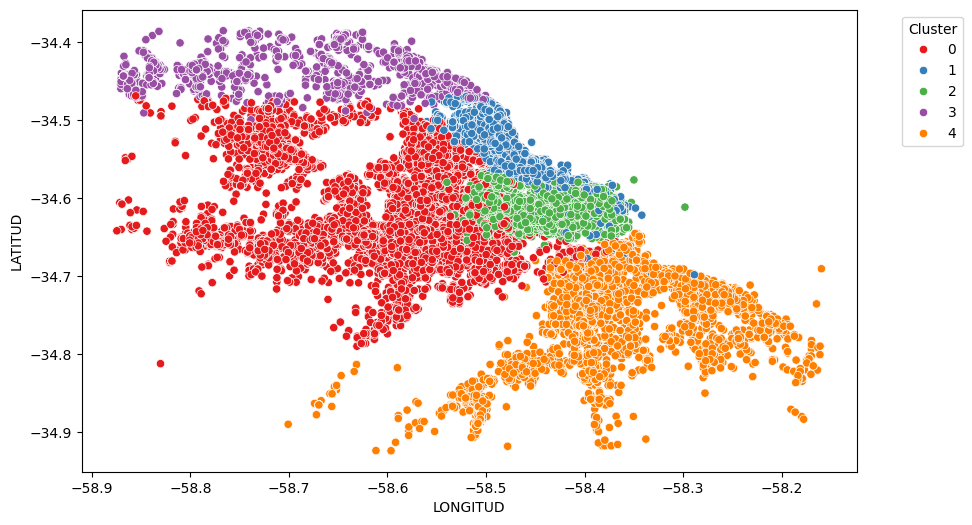

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar las columnas relevantes para el clustering
X = df_completo[['LATITUDE', 'LONGITUDE', 'precio_por_m2']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular la inercia para diferentes valores de k
k_range = range(1, 6)
bic_scores = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, covariance_type='full', reg_covar=1e-6, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))

# Graficar la inercia en función de k
plt.figure(figsize=(10, 6))
plt.plot(k_range, bic_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('BIC')
plt.title('Método del Codo para Determinar el Número de Clusters')
plt.show()

# Seleccionar el número óptimo de clusters (por ejemplo, el que minimiza la inercia)
optimal_k = k_range[bic_scores.index(min(bic_scores))]

# Aplicar GMM clustering con el número óptimo de clusters
gmm = GaussianMixture(n_components=optimal_k, covariance_type='full', reg_covar=1e-6, random_state=42)
df_completo['cluster'] = gmm.fit_predict(X_scaled)

# Crear un scatter plot de LATITUDE y LONGITUDE, coloreado por cluster
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=df_completo['LONGITUDE'],
                               y=df_completo['LATITUDE'], 
                               hue=df_completo['cluster'], 
                               palette='Set1')  # Usar la paleta Set1 para colores distintos

plt.xlabel('LONGITUD')
plt.ylabel('LATITUD')

# Mostrar la leyenda
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Coeficiente de Silueta: 0.3636163611908325
BIC: 1116271.7311032573
AIC: 1115882.032463844


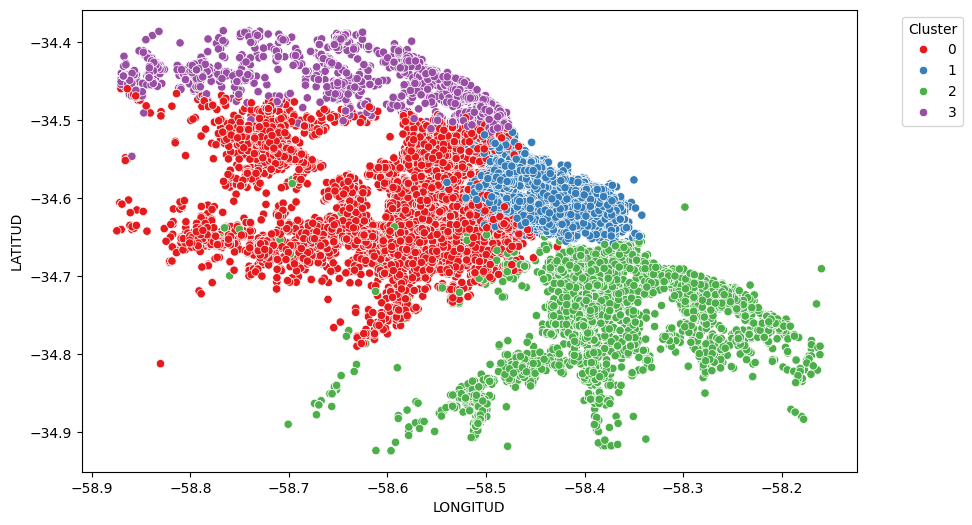

In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar las columnas relevantes para el clustering
X = df_completo[['LATITUDE', 'LONGITUDE', 'precio_por_m2']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar GMM clustering con 5 clusters
gmm = GaussianMixture(n_components=4, covariance_type='full', reg_covar=1e-6, random_state=42)
df_completo['cluster'] = gmm.fit_predict(X_scaled)

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, df_completo['cluster'])
print(f'Coeficiente de Silueta: {silhouette_avg}')

# Calcular BIC y AIC
bic = gmm.bic(X_scaled)
aic = gmm.aic(X_scaled)
print(f'BIC: {bic}')
print(f'AIC: {aic}')

# Crear un scatter plot de LATITUDE y LONGITUDE, coloreado por cluster
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=df_completo['LONGITUDE'],
                               y=df_completo['LATITUDE'], 
                               hue=df_completo['cluster'], 
                               palette='Set1')  # Usar la paleta Set1 para colores distintos

plt.xlabel('LONGITUD')
plt.ylabel('LATITUD')

# Mostrar la leyenda
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

## Generar mapa html

In [ ]:
import seaborn as sns

# Obtener los primeros 5 colores de la paleta Set1
cluster_colors = sns.color_palette('Set1', 5).as_hex()
import folium
import pandas as pd

# Supongamos que train_completo es tu DataFrame
# Convertir la columna 'cluster' a enteros
df_completo['cluster'] = df_completo['cluster'].astype(int)

# Crear un mapa centrado en la ubicación promedio
m = folium.Map(location=[df_completo['LATITUDE'].mean(), df_completo['LONGITUDE'].mean()], zoom_start=12)

# Añadir los CircleMarkers al mapa
for idx, row in df_completo.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=1,  # Tamaño del marcador
        color=cluster_colors[int(row['cluster'])],  # Asignar color según el cluster
        fill=True,
        fill_color=cluster_colors[int(row['cluster'])],  # Llenar el marcador con el mismo color
        fill_opacity=0.7
    ).add_to(m)

m.fit_bounds([[-35, -59], [-34.3, -58.1]])
# Mostrar el mapa
m.save("../mapas/mapa_clusters_PM_5C.html")


In [23]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Supongamos que train_completo es tu DataFrame
# Seleccionar las columnas relevantes para el clustering
X = train_completo[['LATITUDE', 'LONGITUDE', 'precio_pesos_constantes']]

# Verificar que no haya valores faltantes en X
X = X.dropna()

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar GMM clustering con 5 clusters
gmm = GaussianMixture(n_components=5, covariance_type='full', reg_covar=1e-6, random_state=42)
clusters = gmm.fit_predict(X_scaled)

# Asegurarse de que el índice de train_completo coincida con el de X
train_completo = train_completo.loc[X.index]

# Añadir los clusters al DataFrame original
train_completo['cluster'] = clusters

# Convertir los valores de tipo int64 a tipo int
train_completo['cluster'] = train_completo['cluster'].astype(int)

# Crear un mapa centrado en la ubicación promedio
m = folium.Map(location=[train_completo['LATITUDE'].mean(), train_completo['LONGITUDE'].mean()], zoom_start=12)

# Definir una lista de colores para los clusters
cluster_colors = sns.color_palette('Set1', 5).as_hex()

# Añadir los CircleMarkers al mapa
for idx, row in train_completo.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,  # Tamaño del marcador
        color=cluster_colors[row['cluster']],  # Asignar color según el cluster
        fill=True,
        fill_color=cluster_colors[row['cluster']],  # Llenar el marcador con el mismo color
        fill_opacity=0.7
    ).add_to(m)

m.fit_bounds([[-35, -59], [-34.3, -58.1]])

# Guardar el mapa
m.save("mapa_clusters_dos.html")


In [34]:
import seaborn as sns
import folium
import pandas as pd
import numpy as np

# Obtener los primeros 5 colores de la paleta Set1
cluster_colors = sns.color_palette('Set1', 5).as_hex()

# Supongamos que df_completo es tu DataFrame
# Convertir la columna 'cluster' a enteros
df_completo['cluster'] = df_completo['cluster'].astype(int)

# Definir el tamaño de la cuadrícula (en grados de latitud/longitud)
grid_size = 0.0005

# Crear un mapa centrado en la ubicación promedio
m = folium.Map(location=[df_completo['LATITUDE'].mean(), df_completo['LONGITUDE'].mean()], zoom_start=12)

# Agregar una nueva columna para las celdas de la cuadrícula
df_completo['grid_lat'] = (df_completo['LATITUDE'] // grid_size).astype(int)
df_completo['grid_lon'] = (df_completo['LONGITUDE'] // grid_size).astype(int)

# Agrupar por celdas de la cuadrícula y cluster
grid_aggregated = df_completo.groupby(['grid_lat', 'grid_lon', 'cluster']).size().reset_index(name='count')

# Añadir los cuadrados agrupados al mapa
for idx, row in grid_aggregated.iterrows():
    lat_center = (row['grid_lat'] + 0.5) * grid_size
    lon_center = (row['grid_lon'] + 0.5) * grid_size
    color = cluster_colors[int(row['cluster'])]
    
    folium.Marker(
        location=[lat_center, lon_center],
        icon=folium.DivIcon(html=f"""
            <div style="width: 9px; height: 9px; background-color: {color}; opacity: 0.7; border: 1px solid black;">
            </div>
        """)
    ).add_to(m)

# Ajustar el mapa a los límites de la ubicación
m.fit_bounds([[-35, -59], [-34.3, -58.1]])

m.save("mapa_clusters_cuadrados.html")
